<a href="https://colab.research.google.com/github/Augista/AlgoSearchusingPy/blob/main/KKA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Path/Graph**


In [36]:
# Graph representation
graph = {
    'S': {'A': 6, 'B': 5, 'C': 10},
    'A': {'S': 6, 'E': 6},
    'B': {'S': 5, 'E': 6, 'D': 7},
    'C': {'S': 10, 'D': 6},
    'D': {'B': 7, 'C': 6, 'F': 6},
    'E': {'A': 6, 'B': 6, 'F': 4},
    'F': {'D': 6, 'E': 4, 'G': 3},
    'G': {'F': 3}
}

# Heuristic values based on estimates to the goal 'G'
heuristic_values = {
    'S': 17,
    'A': 10,
    'B': 13,
    'C': 4,
    'D': 2,
    'E': 4,
    'F': 1,
    'G': 0
}


## **A***

In [17]:
import heapq

class NodeA:
    def __init__(self, position, parent=None):
        self.position = position
        self.parent = parent
        self.g = 0  # Cost from start node
        self.h = 0  # Heuristic distance to goal node
        self.f = 0  # Total cost

    def __eq__(self, other):
        return self.position == other.position

    def __lt__(self, other):
        return self.f < other.f  # For the priority queue

# A* algorithm with improved node handling
def a_star(graph, start, end, heuristic_values):
    open_list = []
    closed_list = {}

    start_node = NodeA(start, None)
    end_node = NodeA(end, None)

    heapq.heappush(open_list, start_node)

    steps = 0  # Step counter

    while open_list:
        current_node = heapq.heappop(open_list)
        steps += 1

        print(f"A* Current Node: {current_node.position}, F Function: {current_node.f}")  # Debug print

        if current_node == end_node:
            # Construct the path to return
            path = []
            total_cost = current_node.g  # Store the total cost before current_node becomes None
            while current_node is not None:
                path.append(current_node.position)
                current_node = current_node.parent
            return path[::-1], steps, total_cost  # Return reversed path, step count, and total cost

        # Add current node to closed list
        closed_list[current_node.position] = current_node.g

        for neighbor, weight in graph[current_node.position].items():
            new_g = current_node.g + weight  # Calculate g for the neighbor

            # If the neighbor is already in the closed list with a lower g, skip it
            if neighbor in closed_list and closed_list[neighbor] <= new_g:
                continue

            # Create a new node for the neighbor
            new_node = NodeA(neighbor, current_node)
            new_node.g = new_g  # Cost to reach neighbor
            new_node.h = heuristic_values[neighbor]  # Heuristic value
            new_node.f = new_node.g + new_node.h  # Total cost

            print(f"\tAdding Neighbor: {neighbor}, F Function: {new_node.f}")
            if any(open_node for open_node in open_list if new_node == open_node and new_node.g > open_node.g):
                continue

            heapq.heappush(open_list, new_node)

    return None, steps

def path_cost(path, graph):
    cost = 0
    for i in range(len(path) - 1):
        cost += graph[path[i]][path[i + 1]]
    return cost

start = 'S'
end = 'G'

path_a_star, steps_a_star, totalcost = a_star(graph, start, end, heuristic_values)
print("A* Path found:", path_a_star)
print("A* Steps taken:", steps_a_star)
print("Total Cost", totalcost)


A* Current Node: S, F Function: 0
	Adding Neighbor: A, F Function: 16
	Adding Neighbor: B, F Function: 18
	Adding Neighbor: C, F Function: 14
A* Current Node: C, F Function: 14
	Adding Neighbor: D, F Function: 18
A* Current Node: A, F Function: 16
	Adding Neighbor: E, F Function: 16
A* Current Node: E, F Function: 16
	Adding Neighbor: B, F Function: 31
	Adding Neighbor: F, F Function: 17
A* Current Node: F, F Function: 17
	Adding Neighbor: D, F Function: 24
	Adding Neighbor: G, F Function: 19
A* Current Node: B, F Function: 18
	Adding Neighbor: E, F Function: 15
	Adding Neighbor: D, F Function: 14
A* Current Node: D, F Function: 14
A* Current Node: E, F Function: 15
	Adding Neighbor: F, F Function: 16
A* Current Node: F, F Function: 16
	Adding Neighbor: G, F Function: 18
A* Current Node: D, F Function: 18
A* Current Node: G, F Function: 18
A* Path found: ['S', 'B', 'E', 'F', 'G']
A* Steps taken: 11
Total Cost 18


## **BestFS**

In [18]:
import heapq

class NodeB:
    def __init__(self, position, parent=None):
        self.position = position  # Node name (e.g., 'S', 'A', 'B', etc.)
        self.parent = parent
        self.g = 0  # Cost from start node
        self.h = 0  # Heuristic distance to goal node

    def __eq__(self, other):
        return self.position == other.position

    def __lt__(self, other):
        return self.h < other.h

# Best-First Search algorithm
def best_first_search(graph, start, end, heuristic_values):
    open_list = []
    closed_list = []

    start_node = NodeB(start, None)
    end_node = NodeB(end, None)

    heapq.heappush(open_list, start_node)

    steps = 0  # Step counter

    while open_list:
        current_node = heapq.heappop(open_list)
        closed_list.append(current_node)
        steps += 1  # Increment step counter

        print(f"BestFS Current Node: {current_node.position}, h")  # Debug print

        if current_node == end_node:
            path = []
            while current_node is not None:
                path.append(current_node.position)
                current_node = current_node.parent
            totalpathcost = path_cost(path, graph)
            return path[::-1], steps, totalpathcost  # Return reversed path and step count

        for neighbor, weight in graph[current_node.position].items():
            if neighbor in [node.position for node in closed_list]:
                continue

            new_node = NodeB(neighbor, current_node)
            new_node.h = heuristic_values[neighbor]  # Use heuristic value

            print(f"\tAdding Neighbor: {neighbor}, Heuristic: {new_node.h}")  # Debug print

            # Check if the neighbor is already in the open list
            if any(open_node for open_node in open_list if new_node == open_node):
                continue

            heapq.heappush(open_list, new_node)

    return None, steps  # No path found

def path_cost(path, graph):
    cost = 0
    for i in range(len(path) - 1):
        cost += graph[path[i]][path[i + 1]]  # Sum weights from the graph
    return cost

start = 'S'
end = 'G'


path_bfs, steps_bfs, totalpath_bfs = best_first_search(graph, start, end, heuristic_values)
print("BFS Path found:", path_bfs)
print("BFS Steps:", steps_bfs)
print("BFS Total Path Cost:", totalpath_bfs)


BestFS Current Node: S, h
	Adding Neighbor: A, Heuristic: 10
	Adding Neighbor: B, Heuristic: 13
	Adding Neighbor: C, Heuristic: 4
BestFS Current Node: C, h
	Adding Neighbor: D, Heuristic: 2
BestFS Current Node: D, h
	Adding Neighbor: B, Heuristic: 13
	Adding Neighbor: F, Heuristic: 1
BestFS Current Node: F, h
	Adding Neighbor: E, Heuristic: 4
	Adding Neighbor: G, Heuristic: 0
BestFS Current Node: G, h
BFS Path found: ['S', 'C', 'D', 'F', 'G']
BFS Steps: 5
BFS Total Path Cost: 25


## **Calculating Exec Time, Memory, Steps**

In [20]:
import heapq

class NodeA:
    def __init__(self, position, parent=None):
        self.position = position
        self.parent = parent
        self.g = 0  # Cost from start node
        self.h = 0  # Heuristic distance to goal node
        self.f = 0  # Total cost

    def __eq__(self, other):
        return self.position == other.position

    def __lt__(self, other):
        return self.f < other.f  # For the priority queue

# A* algorithm with improved node handling
def a_star(graph, start, end, heuristic_values):
    open_list = []
    closed_list = {}

    start_node = NodeA(start, None)
    end_node = NodeA(end, None)

    heapq.heappush(open_list, start_node)

    steps = 0  # Step counter

    while open_list:
        current_node = heapq.heappop(open_list)
        steps += 1

        print(f"A* Current Node: {current_node.position}, F Function: {current_node.f}")  # Debug print

        if current_node == end_node:
            # Construct the path to return
            path = []
            total_cost = current_node.g  # Store the total cost before current_node becomes None
            while current_node is not None:
                path.append(current_node.position)
                current_node = current_node.parent
            return path[::-1], steps, total_cost  # Return reversed path, step count, and total cost

        # Add current node to closed list
        closed_list[current_node.position] = current_node.g

        for neighbor, weight in graph[current_node.position].items():
            new_g = current_node.g + weight  # Calculate g for the neighbor

            # If the neighbor is already in the closed list with a lower g, skip it
            if neighbor in closed_list and closed_list[neighbor] <= new_g:
                continue

            # Create a new node for the neighbor
            new_node = NodeA(neighbor, current_node)
            new_node.g = new_g  # Cost to reach this neighbor
            new_node.h = heuristic_values[neighbor]  # Heuristic value
            new_node.f = new_node.g + new_node.h  # Total cost

            print(f"\tAdding Neighbor: {neighbor}, F Function: {new_node.f}")  # Debug print

            # Check if the neighbor is in the open list with a lower g
            if any(open_node for open_node in open_list if new_node == open_node and new_node.g > open_node.g):
                continue

            heapq.heappush(open_list, new_node)

    return None, steps  # No path found

def path_cost(path, graph):
    cost = 0
    for i in range(len(path) - 1):
        cost += graph[path[i]][path[i + 1]]  # Sum weights from the graph.
    return cost

start = 'S'
end = 'G'

tracemalloc.start()
start_time = time.time()

path_a_star, steps_a_star, totalcost = a_star(graph, start, end, heuristic_values)

end_time = time.time()
current, peak = tracemalloc.get_traced_memory()

print("A* Path found:", path_a_star)
print("A* Steps taken:", steps_a_star)
print("Total Cost", totalcost)
print("Execution Time (seconds):", end_time - start_time)
print(f"Current Memory Usage: {current / 10**6} MB; Peak: {peak / 10**6} MB")

tracemalloc.stop()


A* Current Node: S, F Function: 0
	Adding Neighbor: A, F Function: 16
	Adding Neighbor: B, F Function: 18
	Adding Neighbor: C, F Function: 14
A* Current Node: C, F Function: 14
	Adding Neighbor: D, F Function: 18
A* Current Node: A, F Function: 16
	Adding Neighbor: E, F Function: 16
A* Current Node: E, F Function: 16
	Adding Neighbor: B, F Function: 31
	Adding Neighbor: F, F Function: 17
A* Current Node: F, F Function: 17
	Adding Neighbor: D, F Function: 24
	Adding Neighbor: G, F Function: 19
A* Current Node: B, F Function: 18
	Adding Neighbor: E, F Function: 15
	Adding Neighbor: D, F Function: 14
A* Current Node: D, F Function: 14
A* Current Node: E, F Function: 15
	Adding Neighbor: F, F Function: 16
A* Current Node: F, F Function: 16
	Adding Neighbor: G, F Function: 18
A* Current Node: D, F Function: 18
A* Current Node: G, F Function: 18
A* Path found: ['S', 'B', 'E', 'F', 'G']
A* Steps taken: 11
Total Cost 18
Execution Time (seconds): 0.0015501976013183594
Current Memory Usage: 0.01

In [19]:
import heapq
import time
import tracemalloc

class NodeB:
    def __init__(self, position, parent=None):
        self.position = position
        self.parent = parent
        self.g = 0
        self.h = 0

    def __eq__(self, other):
        return self.position == other.position

    def __lt__(self, other):
        return self.h < other.h

def best_first_search(graph, start, end, heuristic_values):
    open_list = []
    closed_list = []
    start_node = NodeB(start, None)
    end_node = NodeB(end, None)
    heapq.heappush(open_list, start_node)
    steps = 0
    while open_list:
        current_node = heapq.heappop(open_list)
        closed_list.append(current_node)
        steps += 1
        if current_node == end_node:
            path = []
            while current_node is not None:
                path.append(current_node.position)
                current_node = current_node.parent
            totalpathcost = path_cost(path, graph)
            return path[::-1], steps, totalpathcost
        for neighbor, weight in graph[current_node.position].items():
            if neighbor in [node.position for node in closed_list]:
                continue
            new_node = NodeB(neighbor, current_node)
            new_node.h = heuristic_values[neighbor]
            if any(open_node for open_node in open_list if new_node == open_node):
                continue
            heapq.heappush(open_list, new_node)
    return None, steps

def path_cost(path, graph):
    cost = 0
    for i in range(len(path) - 1):
        if path[i + 1] in graph[path[i]]:
            cost += graph[path[i]][path[i + 1]]
    return cost

start = 'S'
end = 'G'

tracemalloc.start()
start_time = time.time()

path_bfs, steps_bfs, totalpath_bfs = best_first_search(graph, start, end, heuristic_values)

end_time = time.time()
current, peak = tracemalloc.get_traced_memory()

print("BFS Path found:", path_bfs)
print("BFS Steps:", steps_bfs)
print("BFS Total Path Cost:", totalpath_bfs)
print("Execution Time (seconds):", end_time - start_time)
print(f"Current Memory Usage: {current / 10**6} MB; Peak: {peak / 10**6} MB")

tracemalloc.stop()


BFS Path found: ['S', 'C', 'D', 'F', 'G']
BFS Steps: 5
BFS Total Path Cost: 25
Execution Time (seconds): 0.00026679039001464844
Current Memory Usage: 0.316579 MB; Peak: 0.456584 MB


# Visualize

Visualize

In [22]:
pip install matplotlib seaborn networkx

A* Search Visualize


A* Path found: ['S', 'B', 'E', 'F', 'G']
A* Steps taken: 11
Total Cost: 18
Execution Time (seconds): 0.0005617141723632812
Current Memory Usage: 0.003257 MB; Peak: 0.013537 MB


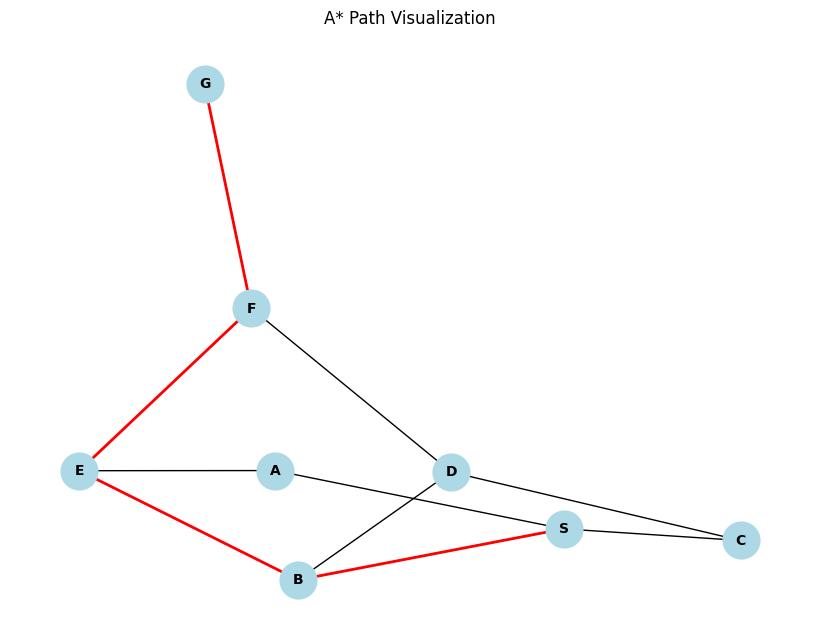

<ipython-input-30-919eed9dbece>:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=metrics, y=values, palette='viridis', hue=None)


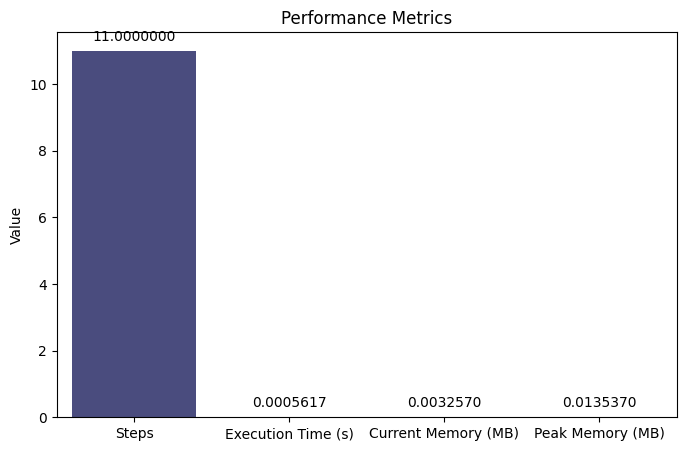

In [30]:
import heapq
import time
import tracemalloc
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

class NodeA:
    def __init__(self, position, parent=None):
        self.position = position
        self.parent = parent
        self.g = 0
        self.h = 0
        self.f = 0

    def __eq__(self, other):
        return self.position == other.position

    def __lt__(self, other):
        return self.f < other.f

def a_star(graph, start, end, heuristic_values):
    open_list = []
    closed_list = {}

    start_node = NodeA(start, None)
    end_node = NodeA(end, None)

    heapq.heappush(open_list, start_node)

    steps = 0

    while open_list:
        current_node = heapq.heappop(open_list)
        steps += 1

        if current_node == end_node:
            path = []
            total_cost = current_node.g
            while current_node is not None:
                path.append(current_node.position)
                current_node = current_node.parent
            return path[::-1], steps, total_cost

        closed_list[current_node.position] = current_node.g

        for neighbor, weight in graph[current_node.position].items():
            new_g = current_node.g + weight

            if neighbor in closed_list and closed_list[neighbor] <= new_g:
                continue

            new_node = NodeA(neighbor, current_node)
            new_node.g = new_g
            new_node.h = heuristic_values[neighbor]
            new_node.f = new_node.g + new_node.h

            if any(open_node for open_node in open_list if new_node == open_node and new_node.g > open_node.g):
                continue

            heapq.heappush(open_list, new_node)

    return None, steps

def visualize_path(graph, path):
    G = nx.Graph()
    for node in graph:
        for neighbor, weight in graph[node].items():
            G.add_edge(node, neighbor, weight=weight)

    pos = nx.spring_layout(G)
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=10, font_weight='bold')

    if path:
        path_edges = list(zip(path[:-1], path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)

    plt.title("A* Path Visualization")
    plt.show()

def plot_performance_metrics(steps, execution_time, current_memory, peak_memory):
    metrics = ['Steps', 'Execution Time (s)', 'Current Memory (MB)', 'Peak Memory (MB)']
    values = [steps, execution_time, current_memory / 10**6, peak_memory / 10**6]

    plt.figure(figsize=(8, 5))
    bar_plot = sns.barplot(x=metrics, y=values, palette='viridis', hue=None)
    plt.title("Performance Metrics")
    plt.ylabel("Value")

    for p in bar_plot.patches:
        bar_plot.annotate(f'{p.get_height():.7f}',
                          (p.get_x() + p.get_width() / 2., p.get_height()),
                          ha='center', va='bottom',
                          fontsize=10, color='black',
                          xytext=(0, 5),
                          textcoords='offset points')

    plt.show()

start = 'S'
end = 'G'

tracemalloc.start()
start_time = time.time()

path_a_star, steps_a_star, total_cost = a_star(graph, start, end, heuristic_values)

end_time = time.time()
current_memory, peak_memory = tracemalloc.get_traced_memory()

print("A* Path found:", path_a_star)
print("A* Steps taken:", steps_a_star)
print("Total Cost:", total_cost)
print("Execution Time (seconds):", end_time - start_time)
print(f"Current Memory Usage: {current_memory / 10**6} MB; Peak: {peak_memory / 10**6} MB")

tracemalloc.stop()

visualize_path(graph, path_a_star)
plot_performance_metrics(steps_a_star, end_time - start_time, current_memory, peak_memory)


 BFS Visualize

BFS Path found: ['S', 'C', 'D', 'F', 'G']
BFS Steps: 5
BFS Total Path Cost: 25
Execution Time (seconds): 0.000339508056640625
Current Memory Usage: 0.007945 MB; Peak: 0.018113 MB


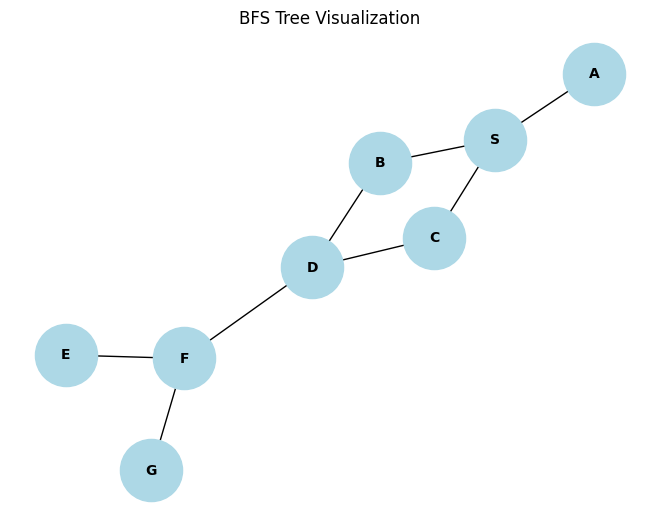

<ipython-input-37-0e44ad850e4d>:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='viridis')


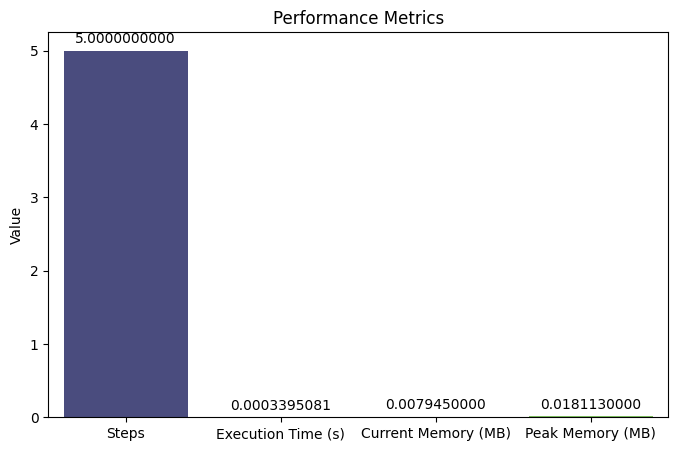

In [37]:
import heapq
import time
import tracemalloc
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

class NodeB:
    def __init__(self, position, parent=None):
        self.position = position
        self.parent = parent
        self.g = 0
        self.h = 0

    def __eq__(self, other):
        return self.position == other.position

    def __lt__(self, other):
        return self.h < other.h

def best_first_search(graph, start, end, heuristic_values):
    open_list = []
    closed_list = []
    start_node = NodeB(start, None)
    end_node = NodeB(end, None)
    heapq.heappush(open_list, start_node)
    steps = 0
    explored_nodes = []

    while open_list:
        current_node = heapq.heappop(open_list)
        closed_list.append(current_node)
        explored_nodes.append(current_node.position)
        steps += 1

        if current_node == end_node:
            path = []
            while current_node is not None:
                path.append(current_node.position)
                current_node = current_node.parent
            totalpathcost = path_cost(path, graph)
            return path[::-1], steps, totalpathcost, explored_nodes

        for neighbor, weight in graph[current_node.position].items():
            if neighbor in [node.position for node in closed_list]:
                continue

            new_node = NodeB(neighbor, current_node)
            new_node.h = heuristic_values[neighbor]

            if any(open_node for open_node in open_list if new_node == open_node):
                continue

            heapq.heappush(open_list, new_node)

    return None, steps, None, explored_nodes

def path_cost(path, graph):
    cost = 0
    for i in range(len(path) - 1):
        cost += graph[path[i]][path[i + 1]]
    return cost

def visualize_bfs_tree(explored_nodes, graph):
    G = nx.Graph()

    for node in explored_nodes:
        for neighbor in graph[node]:
            G.add_edge(node, neighbor)

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold')
    plt.title('BFS Tree Visualization')
    plt.show()

def plot_performance_metrics(steps, execution_time, current_memory, peak_memory):
    metrics = ['Steps', 'Execution Time (s)', 'Current Memory (MB)', 'Peak Memory (MB)']
    values = [steps, execution_time, current_memory / 10**6, peak_memory / 10**6]

    plt.figure(figsize=(8, 5))
    sns.barplot(x=metrics, y=values, palette='viridis')
    plt.title("Performance Metrics")
    plt.ylabel("Value")

    for i, v in enumerate(values):
        plt.text(i, v + 0.1, f"{v:.10f}", ha='center')

    plt.show()

start = 'S'
end = 'G'

tracemalloc.start()
start_time = time.time()

path_bfs, steps_bfs, totalpath_bfs, explored_nodes = best_first_search(graph, start, end, heuristic_values)

end_time = time.time()
current, peak = tracemalloc.get_traced_memory()

print("BFS Path found:", path_bfs)
print("BFS Steps:", steps_bfs)
print("BFS Total Path Cost:", totalpath_bfs)
print("Execution Time (seconds):", end_time - start_time)
print(f"Current Memory Usage: {current / 10**6} MB; Peak: {peak / 10**6} MB")

tracemalloc.stop()

visualize_bfs_tree(explored_nodes, graph)
plot_performance_metrics(steps_bfs, end_time - start_time, current, peak)
